<a href="https://colab.research.google.com/github/eemaansheikh/Data_Science_2025/blob/main/Copy_of_EemaanSheikh_U3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AVERAGE SUMMER RAINFALL IN AUSTIN**





**Question**: What's the true average of rainfall during Austin's Summer months (June, July, and August)?

In [ ]:
##!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

Data Set:

In [5]:
data_chemshift

,0.74
0,0.38
1,2.39
2,1.35
3,0.25
4,0.77
5,5.93
6,3.38
7,0.00
8,2.01
9,0.05


In [4]:
url_chemshift = 'https://raw.githubusercontent.com/eemaansheikh/Data_Science_2025/refs/heads/main/U3_DATASet_csv.ipynb'
#I could have put the url string directly into pd.read_csv()
data_chemshift = pd.read_csv(url_chemshift)

(array([14.,  4.,  6.,  2.,  0.,  3.,  1.,  0.,  1.,  1.]),
 array([ 0.   ,  1.044,  2.088,  3.132,  4.176,  5.22 ,  6.264,  7.308,
         8.352,  9.396, 10.44 ]),
 <BarContainer object of 10 artists>)

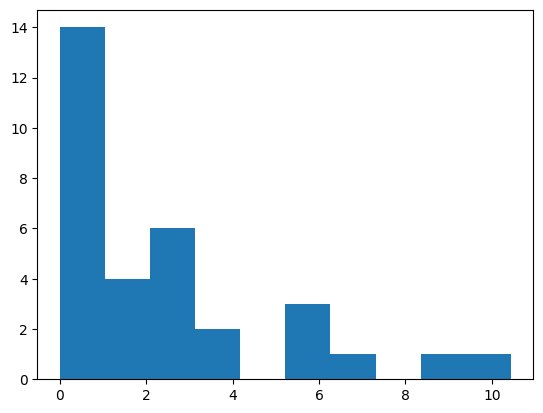

In [6]:
plt.hist(data_chemshift)

In [ ]:
half normal -- all the data must be positive (can't have a negative amount of rainfall ahahahahahahah) and there is a rihgt skew, meaning there is more weight on the smaller values


<Axes: >

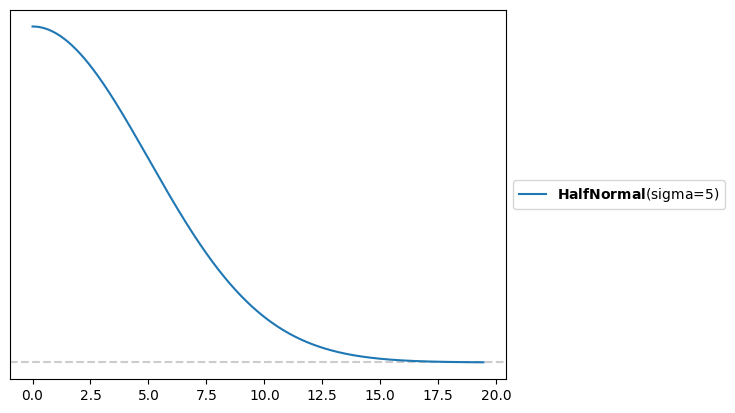

In [8]:
pz.HalfNormal(sigma = 5).plot_pdf()


skew student t distribution -- again, heavy rightskew and asymmetry toward the smaller numbers and has a more flexible shape than a regular sutdent t, especially since my data set has some numbers that coudl be considered outliers; accounts for skew more than the half normal distribution. an important set back however would be that its not entirely positive.

<Axes: >

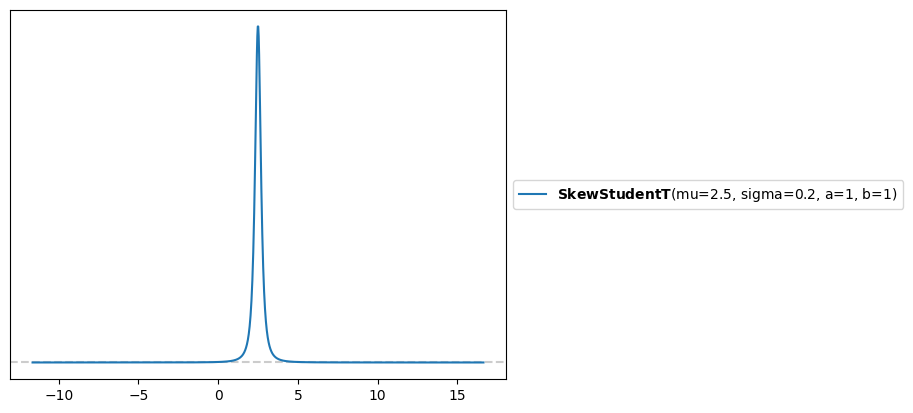

In [20]:
pz.SkewStudentT(mu=2.5, sigma=0.20, a=1, b=1).plot_pdf()
#$\mu$ : (float) Location parameter.
#$\sigma$ : (float) Scale parameter.
#$a$ : (float) Shape parameter.
#$b$ : (float) Shape parameter

In [45]:
#N for normal
with pm.Model() as model_chemshiftN:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    μ = pm.SkewStudentT('μ', mu=1.5, sigma=0.20, a=1, b=1)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=5)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_chemshift)
    idata_chemshiftN = pm.sample()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

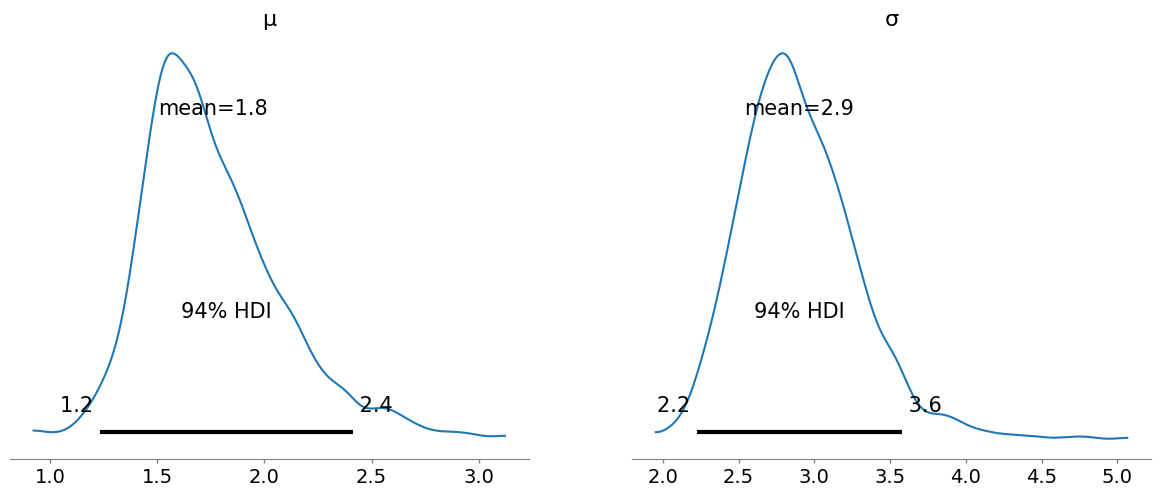

In [46]:
az.plot_posterior(idata_chemshiftN)


In [48]:
pm.sample_posterior_predictive(idata_chemshiftN, model=model_chemshiftN, extend_inferencedata=True)


Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

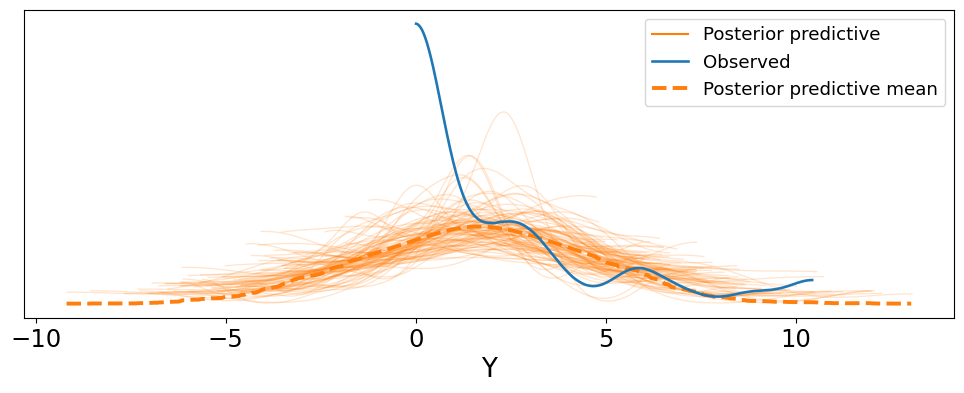

In [49]:
az.plot_ppc(idata_chemshiftN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


choose another likelihood, not another prior